## Amazon data set - Electronics

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gzip
import json
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from datasets import load_dataset

# supporting methods - credits to https://www.geeksforgeeks.org/
def parse(path):
    g = gzip.open(path, "rb")
    for l in g:
        yield json.loads(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient="index")

def generate_wordcloud(df, text_column):
    comment_words = ''
    stopwords = set(STOPWORDS)
 
    for val in df[text_column]:
        val = str(val)
        tokens = val.split()
     
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
     
        comment_words += " ".join(tokens) + " "
    
    wordcloud = WordCloud(width = 500, height = 500,
                    background_color = "white",
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)

    plt.figure(figsize = (5, 5), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
 
    plt.show()
    
    
def generate_common_occurences(df, text_column, number_of_most_common):
    text = " ".join(df[text_column].unique().tolist())
    split_it = text.lower().split()
    cnt = Counter(split_it)
    most_occur = cnt.most_common(number_of_most_common)
    df_print = pd.DataFrame(most_occur)
    df_print.columns = ["word", "occurences"]
    display(df_print)

C:\Users\welki\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


This part is not reproducible since Electronics_5.json.gz is not included in the repository - it is over one GB.

In [2]:
df = getDF("../data/Electronics_5.json.gz")

In [3]:
df = df.loc[:,["asin", "overall", "reviewText", "summary"]].drop_duplicates()

In [4]:
df["Review_Length"]  = df["reviewText"].str.len()

In [5]:
df = df.sort_values("Review_Length", ascending=False)

In [6]:
df = df.head(100000)

In [7]:
df = df.groupby("overall", group_keys=False).apply(lambda x: x.sample(1000))

In [8]:
df.to_csv("../data/amazon_electronics.csv")

From this part it is reproducible.

In [2]:
df_amazon = pd.read_csv("../data/amazon_electronics.csv")

##### Number of observations for each polarity

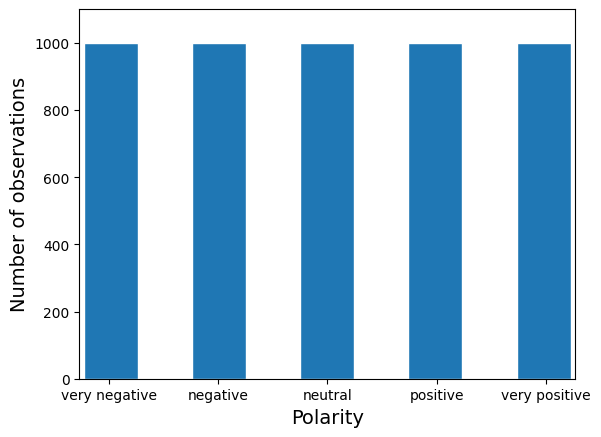

In [3]:
fig, ax = plt.subplots()
ax.set_xticks(
    ticks=[1.2, 2.1, 3, 3.9, 4.8],
    labels=["very negative","negative", "neutral", "positive", "very positive"])
values, bins, bars = plt.hist(df_amazon['overall'], edgecolor='white', bins=9)
plt.xlabel("Polarity", fontsize=14)
plt.ylabel("Number of observations", fontsize=14)
plt.margins(x=0.01, y=0.1)

##### Length distribution of reviews

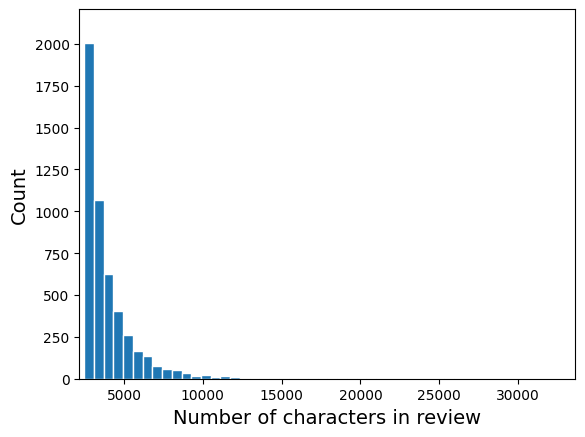

In [4]:
fig, ax = plt.subplots()
values, bins, bars = plt.hist(df_amazon["Review_Length"], edgecolor="white", bins=50)
plt.ylabel("Count", fontsize=14)
plt.xlabel("Number of characters in review", fontsize=14)
plt.margins(x=0.01, y=0.1)

##### Most common words in the data set

In [5]:
generate_common_occurences(df=df_amazon,
                           text_column="reviewText",
                           number_of_most_common=5)

,word,occurences
0,the,203494
1,to,101370
2,and,87750
3,a,87019
4,i,86669


##### Word cloud - significant textual data

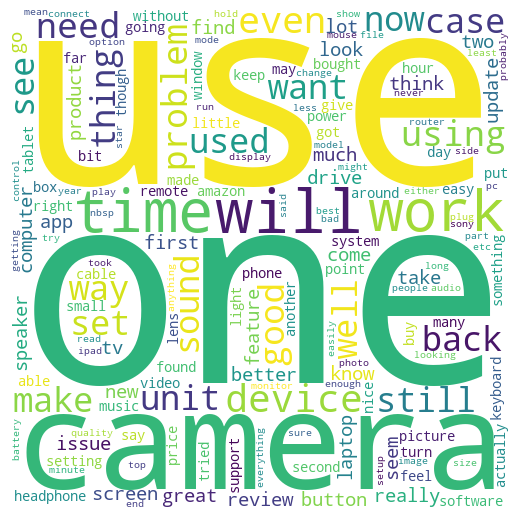

In [6]:
generate_wordcloud(df=df_amazon,
                   text_column="reviewText")

## SemEval 2014 Task 4

In [7]:
laptops = pd.read_csv("../data/Laptop_Train_v2.csv")

In [8]:
restaurants = pd.read_csv("../data/Restaurants_Train_v2.csv")

In [9]:
sem_val = pd.concat([laptops, restaurants])

In [10]:
sem_val["Sentence_Length"]  = sem_val["Sentence"].str.len()

##### Number of observations for each polarity

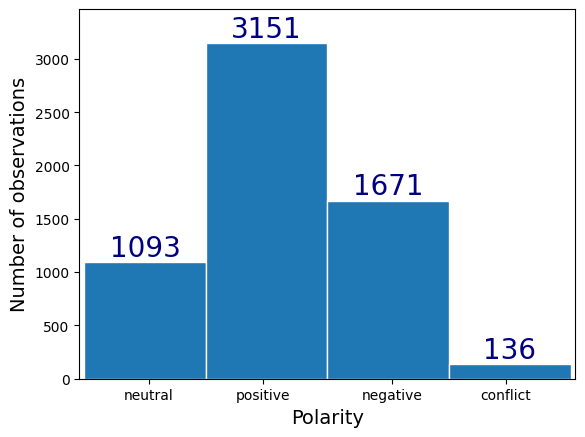

In [11]:
fig, ax = plt.subplots()
ax.set_xticks([0.4, 1.1, 1.9, 2.6])
values, bins, bars = plt.hist(sem_val["polarity"], edgecolor="white", bins=4)
plt.xlabel("Polarity", fontsize=14)
plt.ylabel("Number of observations", fontsize=14)
plt.bar_label(bars, fontsize=20, color="navy")
plt.margins(x=0.01, y=0.1)

##### Length distribution of reviews

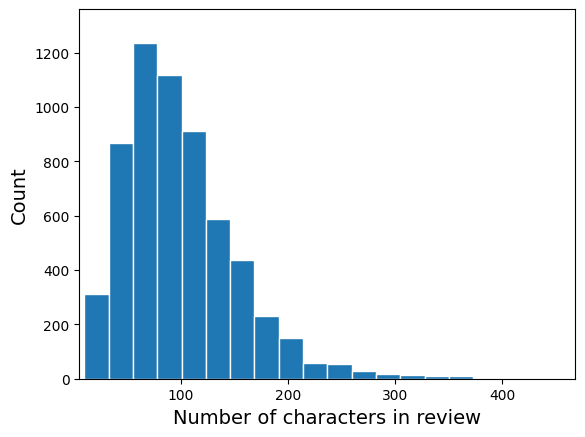

In [12]:
fig, ax = plt.subplots()
values, bins, bars = plt.hist(sem_val["Sentence_Length"], edgecolor="white", bins=20)
plt.ylabel("Count", fontsize=14)
plt.xlabel("Number of characters in review", fontsize=14)
plt.margins(x=0.01, y=0.1)

##### Distribution of reviews and aspects among each subset of the data set

In [13]:
df = pd.DataFrame({"Domain": ["Laptops", "Restaurants", "Total"],
              "Number of reviews": [1482, 2019, 3501],
              "Number of aspects": [2358, 3693, 6051]})

display(df)

,Domain,Number of reviews,Number of aspects
0,Laptops,1482,2358
1,Restaurants,2019,3693
2,Total,3501,6051


##### Most common words in the data set

In [14]:
generate_common_occurences(df=sem_val,
                           text_column="Sentence",
                           number_of_most_common=5)

,word,occurences
0,the,3697
1,and,2020
2,a,1362
3,to,1316
4,is,1199


##### Word cloud - significant textual data

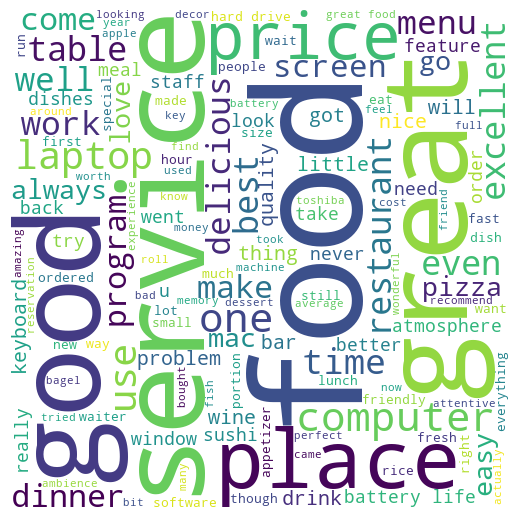

In [15]:
generate_wordcloud(df=sem_val,
                   text_column="Sentence")

##### Word cloud - significant aspects (laptops)

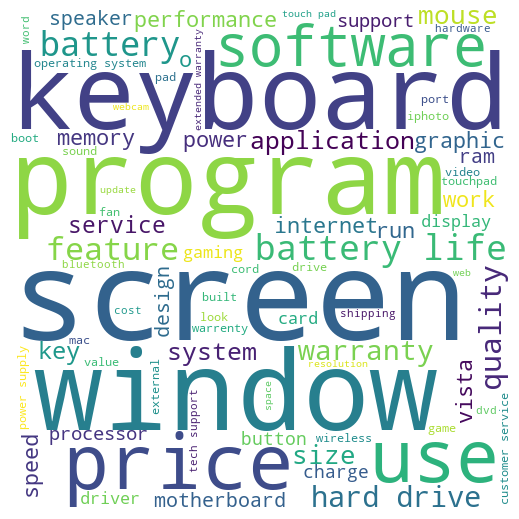

In [16]:
generate_wordcloud(df=laptops,
                   text_column="Aspect Term")

##### Word cloud - significant aspects (restaurants)

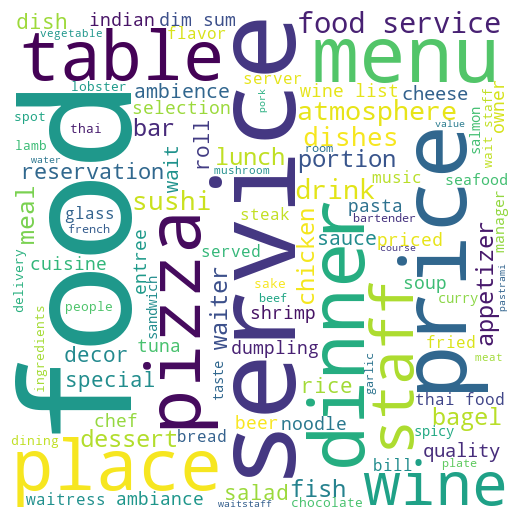

In [17]:
generate_wordcloud(df=restaurants,
                   text_column="Aspect Term")

## PolEmo 2.0

In [18]:
dataset = load_dataset("clarin-pl/polemo2-official")

In [19]:
polemo = pd.DataFrame({
    "review": dataset["train"]["text"],
    "label": dataset["train"]["target"]
})

In [20]:
polemo.loc[polemo.label==0,"label"] = "neutral"
polemo.loc[polemo.label==1,"label"] = "negative"
polemo.loc[polemo.label==2,"label"] = "positive"
polemo.loc[polemo.label==3,"label"] = "ambivalent"

C:\Users\welki\AppData\Local\Temp\ipykernel_1348\3152605803.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'neutral' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  polemo.loc[polemo.label==0,"label"] = "neutral"


In [21]:
polemo["Review_Length"]  = polemo["review"].str.len()

##### Number of observations for each polarity

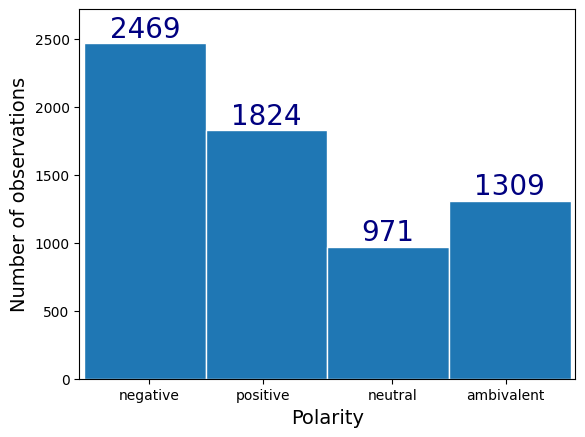

In [22]:
fig, ax = plt.subplots()
ax.set_xticks([0.4, 1.1, 1.9, 2.6])
values, bins, bars = plt.hist(polemo["label"], edgecolor="white", bins=4)
plt.xlabel("Polarity", fontsize=14)
plt.ylabel("Number of observations", fontsize=14)
plt.bar_label(bars, fontsize=20, color="navy")
plt.margins(x=0.01, y=0.1)

##### Length distribution of reviews

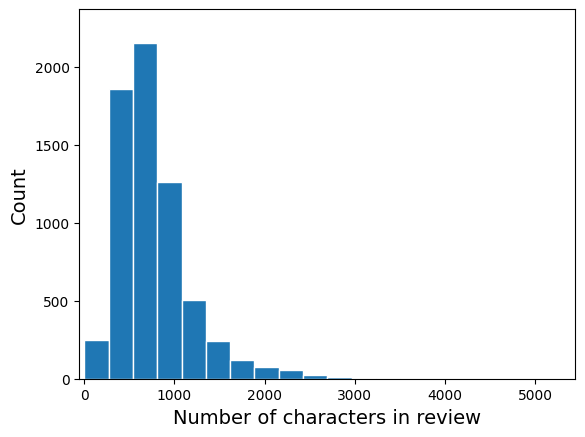

In [23]:
fig, ax = plt.subplots()
values, bins, bars = plt.hist(polemo["Review_Length"], edgecolor="white", bins=20)
plt.ylabel("Count", fontsize=14)
plt.xlabel("Number of characters in review", fontsize=14)
plt.margins(x=0.01, y=0.1)

##### Most common words in the data set

In [24]:
generate_common_occurences(df=polemo,
                           text_column="review",
                           number_of_most_common=5)

,word,occurences
0,.,56895
1,",",48555
2,w,20752
3,i,18848
4,nie,16301


##### Word cloud - significant textual data

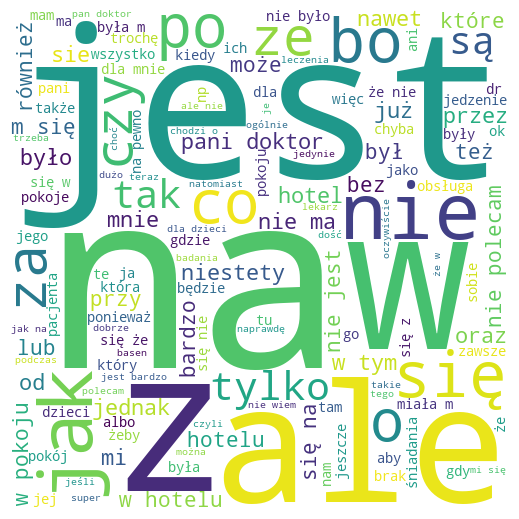

In [25]:
generate_wordcloud(df=polemo,
                   text_column="review")

In [26]:
polemo.to_csv("../data/polemo.csv", encoding="utf-8")

## Combined plots

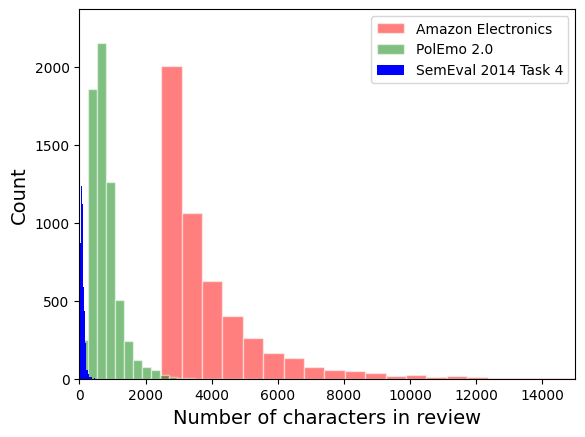

In [27]:
fig, ax = plt.subplots()
values, bins, bars = plt.hist(df_amazon["Review_Length"], edgecolor="white", bins=50, alpha=0.5, color="red", label="Amazon Electronics")
values, bins, bars = plt.hist(polemo["Review_Length"], edgecolor="white", bins=20, alpha=0.5, color="green", label="PolEmo 2.0")
values, bins, bars = plt.hist(sem_val["Sentence_Length"], bins=20, color="blue", label="SemEval 2014 Task 4")
plt.ylabel("Count", fontsize=14)
plt.xlabel("Number of characters in review", fontsize=14)
plt.xlim([0,15000])
plt.legend()
plt.margins(x=0.01, y=0.1)
